In [1]:
import networkx as nx
import matplotlib.pyplot as plt

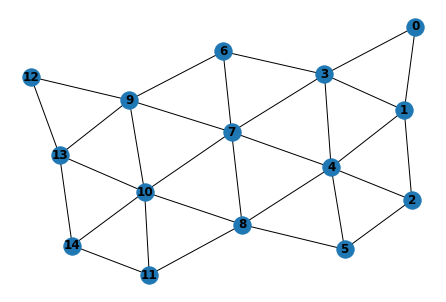

In [2]:
G = nx.triangular_lattice_graph(4,4)
G = nx.convert_node_labels_to_integers(G)
nx.draw(G, with_labels=True, font_weight='bold')
plt.savefig('graph_A6.pdf')

In [4]:
# Find min vertex cover on the QPU
import dwave_networkx as dnx
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())
solution = dnx.min_vertex_cover(G, sampler)
print("Minimum vertex cover found using the QPU:")
print(solution)

[1, 3, 4, 5, 7, 9, 10, 11, 13]


In [5]:
# Brute force method with ExactSolver
from dimod.reference.samplers import ExactSolver
sampler = ExactSolver()
es_solution = dnx.min_vertex_cover(G, sampler)
print("Minimum vertex cover found using ExactSover:")
print(es_solution)

Minimum vertex cover found using ExactSover:
[1, 3, 4, 5, 7, 9, 10, 11, 13]


In [6]:
# Confirm match and run on GPU again until optimal answer found

if solution == es_solution:
    print("The QPU got the optimal answer on the first try")
else:
    count = 0
    sampler = EmbeddingComposite(DWaveSampler())
    while solution != es_solution:
        solution = dnx.min_vertex_cover(G, sampler)
        count += 1
    print("It took", count, "more runs for the QPU to get the optimal answer:", es_solution)

The QPU got the optimal answer on the first try
